# Introduction to Machine Learning

## Lecturer details

* Tomasz Golan
    
    * email: [tomasz.golan@uwr.edu.pl](mailto: tomasz.golan@uwr.edu.pl)
    
    * room@ift: 438
    
    * phone: +48 71 375-9405
    
    * consultations:
    
        * Monday 11-12
        
        * Thursday 16-17 

## Lecture details

### Plan

* Introduction

* k-Nearest Neighbors

* Decision Tree

* Support Vector Machine

* Multilayer Perceptron

* Deep Learning

### Literature

* “Deep Learning” by Ian Goodfellow, Yoshua Bengio, Aaron Courville

* “Pattern Recognition and Machine Learning” by Christopher Bishop

### Recommended prerequisite knowledge

* Linear algebra

* Calculus

* Python

### Exam

* In the form of the presentation

* Individual or group project

* At least one machine learning algorithm must be used

* With the model description included

## *useful (but not interesting) functions*

* Here, I just define some functions used for making demo plots during the introduction.

* Feel free to look at them later (especially if you are not familiar with `numpy` and `matplotlib`).

* But now let's skip them.

In [0]:
# numpy and matplotlib will be used a lot during the lecture
# if you are familiar with these libraries you may skip this part
# if not - extended comments were added to make it easier to understand

# it is kind of standard to import numpy as np and pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

# used later to apply different colors in for loops
mpl_colors = ('r', 'b', 'g', 'c', 'm', 'y', 'k', 'w')

# just to overwrite default colab style
plt.style.use('default')
plt.style.use('seaborn-talk')


def generate_random_points(size=10, low=0, high=1):
  """Generate a set of random 2D points
  
  size -- number of points to generate
  low  -- min value
  high -- max value
  """
  # random_sample([size]) returns random numbers with shape defined by size
  # e.g.
  # >>> np.random.random_sample((2, 3))
  #
  # array([[ 0.44013807,  0.77358569,  0.64338619],
  #        [ 0.54363868,  0.31855232,  0.16791031]])
  #
  return (high - low) * np.random.random_sample((size, 2)) + low


def init_plot(x_range=None, y_range=None, x_label="$x_1$", y_label="$x_2$"):
  """Set axes limits and labels
  
  x_range -- [min x, max x]
  y_range -- [min y, max y]
  x_label -- string
  y_label -- string
  """
 
  # subplots returns figure and axes
  # (in general you may want many axes on one figure)
  # we do not need fig here
  # but we will apply changes (including adding points) to axes
  _, ax = plt.subplots(dpi=70)
  
  # set grid style and color
  ax.grid(c='0.70', linestyle=':')
  
  # set axes limits (x_range and y_range is a list with two elements)
  ax.set_xlim(x_range) 
  ax.set_ylim(y_range)
    
  # set axes labels
  ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)
  
  # return axes so we can continue modyfing them later
  return ax


def plot_random_points(style=None, color=None):
  """Generate and plot two (separated) sets of random points
  
  style -- latter group points style (default as first)
  color -- latter group color (default as first)
  """
  
  # create a plot with x and y ranges from 0 to 2.5
  ax = init_plot([0, 2.5], [0, 2.5])

  # add two different sets of random points
  # first set = 5 points from [0.5, 1.0]x[0.5, 1.0]
  # second set = 5 points from [1.5, 2.0]x[1.5, 2.0]
  # generate_random_points return a numpy array in the format like
  # [[x1, y1], [x2, y2], ..., [xn, yn]]
  # pyplot.plt take separately arrays with X and Y, like
  # plot([x1, x2, x3], [y1, y2, y3])
  # thus, we transpose numpy array to the format
  # [[x1, x2, ..., xn], [y1, y2, ..., yn]]
  # and unpack it with *
  ax.plot(*generate_random_points(5, 0.5, 1.0).T, 'ro')
  ax.plot(*generate_random_points(5, 1.5, 2.0).T, style or 'ro')
  
  return ax


def plot_an_example(style=None, color=None, label="Class"):
  """Plot an example of supervised or unsupervised learning"""
  ax = plot_random_points(style, color)

  # circle areas related to each set of points
  # pyplot.Circle((x, y), r); (x, y) - the center of a circle; r - radius
  # lw - line width
  ax.add_artist(plt.Circle((0.75, 0.75), 0.5, fill=0, color='r', lw=2))
  ax.add_artist(plt.Circle((1.75, 1.75), 0.5, fill=0, color=color or 'r', lw=2))

  # put group labels
  # pyplot.text just put arbitrary text in given coordinates
  ax.text(0.65, 1.4, label + " I", fontdict={'color': 'r'})
  ax.text(1.65, 1.1, label + " II", fontdict={'color': color or 'r'})

## Introduction

### What is machine learning?

```
+-------------------------------------------------------------------------+
|                                                                         |
|  Any technique which enables                                            |
|  computers to mimic human                      Artificial Intelligence  |
|  intelligence                                                           |
|                                                                         |
|     +-------------------------------------------------------------------+
|     |                                                                   |
|     |   Statistical techniques which                                    |
|     |   enable computers to improve               Machine Learning      |
|     |   with experience (subset of AI)                                  |
|     |                                                                   |
|     |       +-----------------------------------------------------------+
|     |       |                                                           |
|     |       |  Subset of ML which makes                                 |
|     |       |  the computations using              Deep Learning        |
|     |       |  multi-layer neural networks                              |
|     |       |                                                           |
+-----+-------+-----------------------------------------------------------+
```

### Supervised learning

* Problems: classification, regression

* Let $\vec x_i \in X$ be feature vectors

* Let $y_i \in Y$ be class labels

* Let $h: X \rightarrow Y$ be hypothesis

* Find $h(\vec x)$ given $N$ training examples $\left\{(\vec x_1, y_1), ..., (\vec x_N, y_N)\right\}$

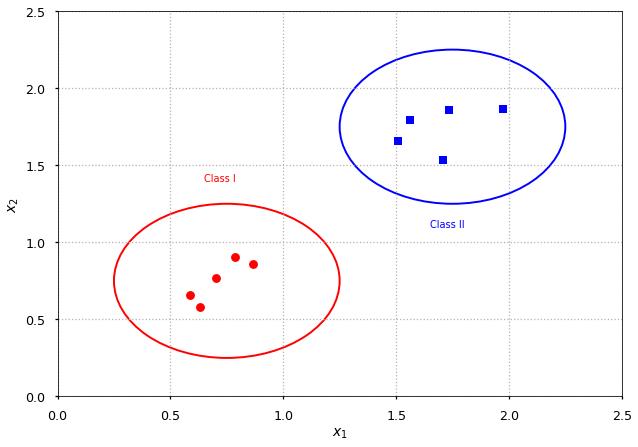

In [2]:
plot_an_example(style='bs', color='b');

### Unsupervised learning

* In opposite to supervised learning data is not labeled

* Problems: clustering, association

* For example: k-means clustering, self-organizing maps

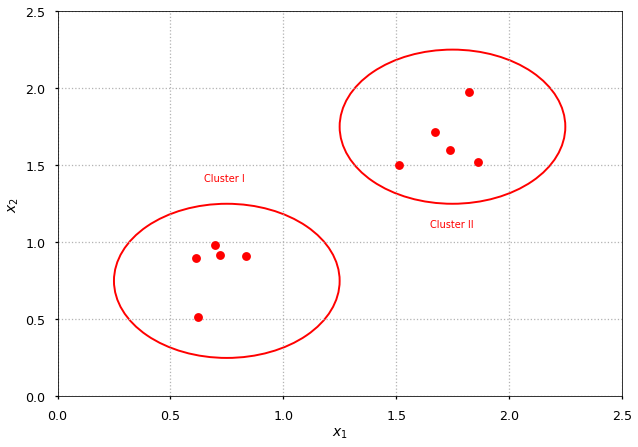

In [3]:
plot_an_example(label="Cluster");

### Example: Supervised vs Unsupervised

* Having $N$ photos of different animals

* Supervised task (requires labeled data)

> Train an algorithm to recognise given species on a photo.

> Output: There is X on a photo.

* Unsupervised task

> Train an algorithm to group animals with similar features.

> Output: No idea what it is, but it looks similar to these animals.

### Reinforcement learning

```
                +---------+
                |         |
       +--------+  AGENT  | <------+
       |        |         |        |
       |        +---------+        |
       |                           | Observation
Action |                           |
       |                           | Reward
       |     +---------------+     |
       |     |               |     |
       +---> |  ENVIRONMENT  +-----+
             |               |
             +---------------+
```

### ML applications

* Image recognition

    * [Google Maps](https://maps.google.com) - finding licence plates and faces; extracting street names and building numbers

    * [Facebook](https://facebook.com) - recognising similar faces
  
* Speech recognition

    * [Microsoft](https://microsoft.com) - Cortana
    
    * [Apple](https://apple.com) - Siri
  
* Natural Language Processing

    * [Google Translate](https://translate.google.pl/) - machine translation
    
    * [Next Game of Thrones Book](https://blog.udacity.com/2017/08/neural-network-game-of-thrones.html) - language modeling
  
* Misc

    * [PayPal](https://paypal.com/) - fraud alert

    * [Netflix](https://netflix.com), [Amazon](https://amazon.com) - recommendation system

    * [Art](https://www.boredpanda.com/computer-deep-learning-algorithm-painting-masters/)

    ![art](https://static.boredpanda.com/blog/wp-content/uploads/2015/08/computer-deep-learning-algorithm-painting-masters-12.jpg)

    * [AlphaGo](https://deepmind.com/research/alphago/)

    ![alphago](https://media-exp2.licdn.com/mpr/mpr/AAEAAQAAAAAAAA2sAAAAJGQyYzBkMmViLTczMmItNDdhZC1hYmNkLWU5OTljZjhjNmY5Mg.png)

### ML Fails

* Amazon's Alexa - TV broadcast caused many orders around San Diego when presenter said *I love the little girl, saying 'Alexa ordered me a dollhouse'.*

* Amazon's Alexa - when a kid asked for his favorite song *Digger, Digger* Alexa's respond was: *You want to hear a station for porn detected … hot chick amateur girl sexy.*

* Microsoft's Tay chatbot learned from tweets how to be racist

![tay](https://d.ibtimes.co.uk/en/full/1502271/tay-tweets.jpg)

* Passport checker rejects Asian's photo because *eyes are closed*

![asian](https://assets.entrepreneur.com/slideshow/20170223234052-s3reutersmedia.jpeg)

* So make sure you can not relate to this

![ml](https://www.kdnuggets.com/images/cartoon-machine-learning-what-they-think.jpg)

### ML Frameworks

* [Tensorflow](https://www.tensorflow.org/) by Google - Python (and somewhat in C/C++)

* [Caffe](http://caffe.berkeleyvision.org/) by Berkeley Vision and Learning Center - C/C++, Python, MATLAB, Command line interface

* [Torch](http://torch.ch/) by many - Lua and C/C++

* [Theano](http://deeplearning.net/software/theano/) by University of Montreal - Python (development stopped in 2017)

* [scikit-learn](http://scikit-learn.org) by many - Python

* and many others